In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/dataset_flujo_vehicular.csv")

In [3]:
df.sample(5)

,CODIGO_LOCACION,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD
50498,48Q3CJ00+,17SEP2020:15:00:00,1907,Ingreso,-34.588796,-58.381520
189170,48Q3CH00+,18FEB2022:10:00:00,510,Egreso,-34.579632,-58.427733
155360,48Q3CJ00+,24NOV2021:19:00:00,3157,Ingreso,-34.588796,-58.381520
167838,48Q3CH00+,18JAN2022:02:00:00,90,Interna,-34.579632,-58.427733
91912,48Q39H00+,27FEB2021:06:00:00,229,Interna,-34.618036,-58.410236


In [4]:
# Convert series to Datetime 
# Example: 28OCT2021:00:00:00
# Example: 07AUG2020:05:00:00
# Example: 21NOV2021:13:00:00
# format: %d%b%Y:%H:%M:%S

df["fecha"] = pd.to_datetime(df["HORA"], format="%d%b%Y:%H:%M:%S")

In [5]:
df["anio"] = df["fecha"].dt.year
df["mes"] = df["fecha"].dt.month
df["dia"] = df["fecha"].dt.day
df["hr"] = df["fecha"].dt.hour

In [6]:
# drop "HORA" column
new = df.drop('HORA', axis=1).drop('CODIGO_LOCACION', axis=1).drop('fecha', axis=1)
new.sample(5)

,CANTIDAD,SENTIDO,LATITUD,LONGITUD,anio,mes,dia,hr
12088,378,Egreso,-34.633299,-58.468594,2020,4,8,3
157636,1977,Ingreso,-34.633299,-58.468594,2021,10,17,0
179852,4250,Egreso,-34.588796,-58.381520,2022,2,24,15
5039,1095,Interna,-34.608550,-58.372951,2020,3,13,3
182699,1424,Interna,-34.536980,-58.470968,2022,2,26,8


In [7]:
import matplotlib.pyplot as plt

<BarContainer object of 5000 artists>

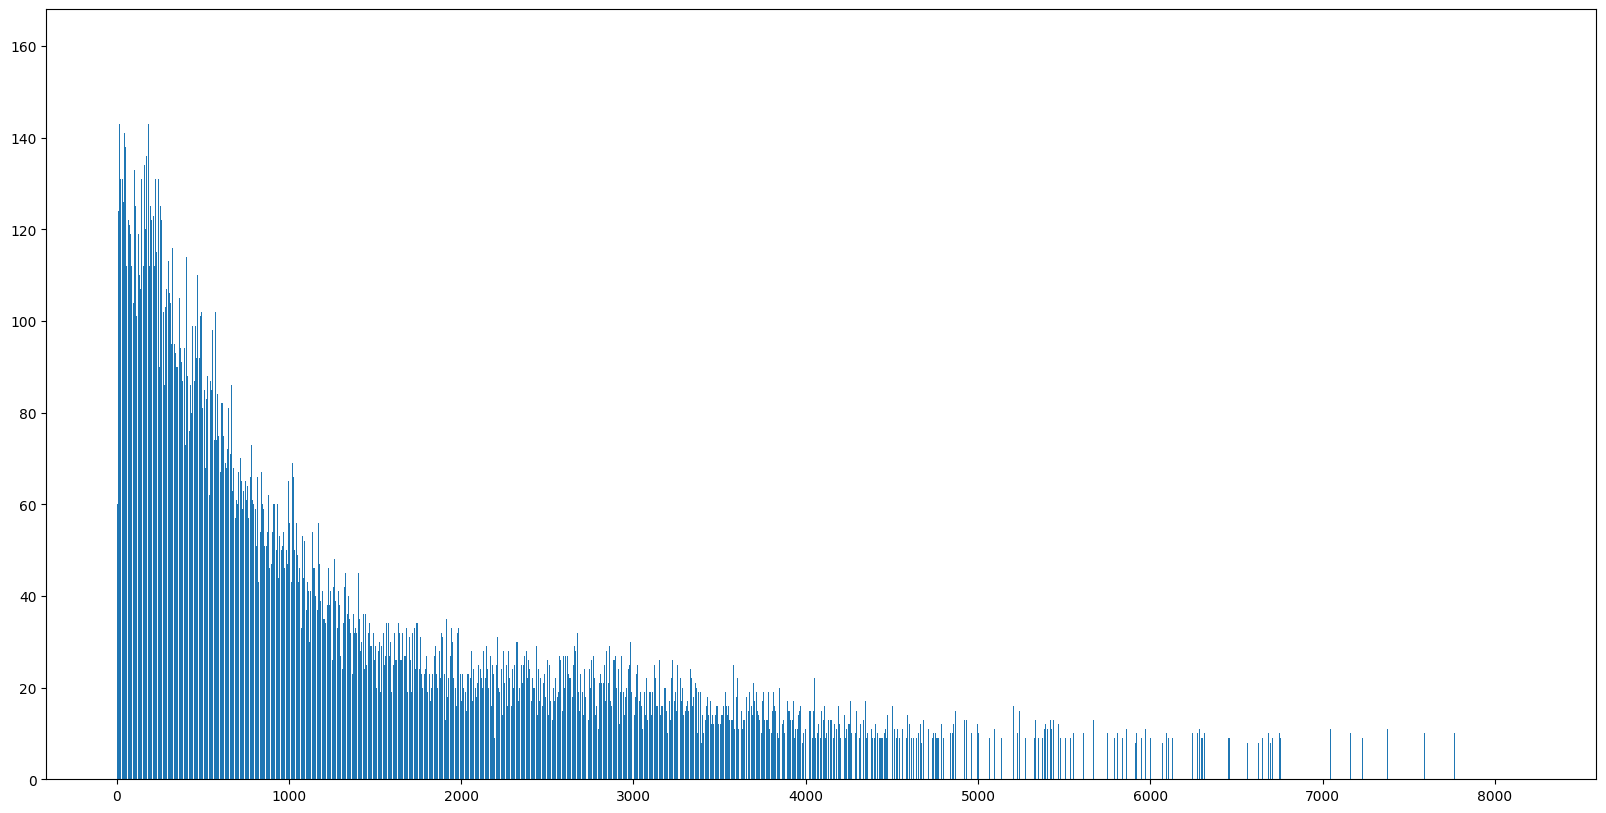

In [8]:
# Check distribution of column "CANTIDAD"

new["CANTIDAD"].value_counts()

# Name: CANTIDAD, Length: 10882, dtype: int64
# Too many values to plot, so we will plot the first 1000 values
# In the x axis we will have the values of the column "CANTIDAD"
# In the y axis we will have the number of times that value appears in the column "CANTIDAD"

plt.figure(figsize=(20,10))

plt.bar(new["CANTIDAD"].value_counts().index[:5000], new["CANTIDAD"].value_counts().values[:5000])

In [10]:
# Get the distribution of the data
# new["CANTIDAD"].value_counts()

# Mean
mean = new["CANTIDAD"].mean()
print("mean", mean)

# Median
median = new["CANTIDAD"].median()
print("median", median)

# Mode
mode = new["CANTIDAD"].mode()
print("mode", mode)

# Standard Deviation
std = new["CANTIDAD"].std()
print("std", std)

# Variance
var = new["CANTIDAD"].var()
print("var", var)

# Range
rng = new["CANTIDAD"].max() - new["CANTIDAD"].min()
print("range", rng)

# Quartiles
quartiles = new["CANTIDAD"].quantile([0.25, 0.5, 0.75])
print("quartiles", quartiles)

# Interquartile Range
iqr = new["CANTIDAD"].quantile(0.75) - new["CANTIDAD"].quantile(0.25)
print("IQR", iqr)

# Minimum
mn = new["CANTIDAD"].min()
print("min", mn)

# Maximum
mx = new["CANTIDAD"].max()
print("max", mx)

# Skewness
skew = new["CANTIDAD"].skew()
print("skew", skew)

mean 2077.6278409390247
median 1155.0
mode 0    207
Name: CANTIDAD, dtype: int64
std 2339.195846898098
var 5471837.210145309
range 179339
quartiles 0.25     423.0
0.50    1155.0
0.75    3005.0
Name: CANTIDAD, dtype: float64
IQR 2582.0
min 1
max 179340
skew 4.3415846833327985


In [14]:
new["CANTIDAD"].value_counts().sample(1000)

2349    18
3652    16
5032     4
5160     7
1522    32
        ..
8675     3
6428     5
4049     9
4912     9
3431    16
Name: CANTIDAD, Length: 1000, dtype: int64

In [18]:
import numpy as np

In [ ]:
import scipy.stats as stats

In [34]:
mean

2077.6278409390247

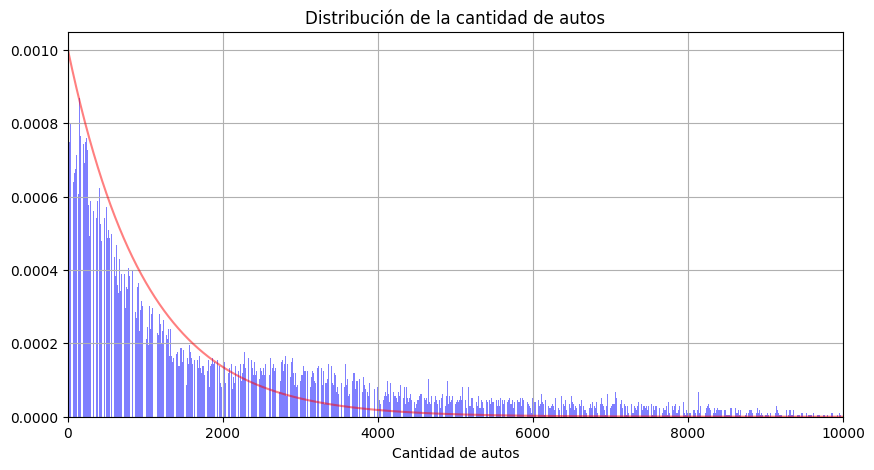

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
muestras = new["CANTIDAD"].value_counts().sample(10000)
plt.bar(muestras.index, muestras.values / muestras.sum(), color="blue", alpha=0.5)

# Exponential distribution

x = np.linspace(0, 10000, 10000)
y = stats.expon.pdf(x, scale=1000)

ax.plot(x, y, color="red", alpha=0.5)
ax.grid(True)
ax.set_title("Distribución de la cantidad de autos")
ax.set_xlabel("Cantidad de autos")

plt.xlim(0, 10000)
plt.show()

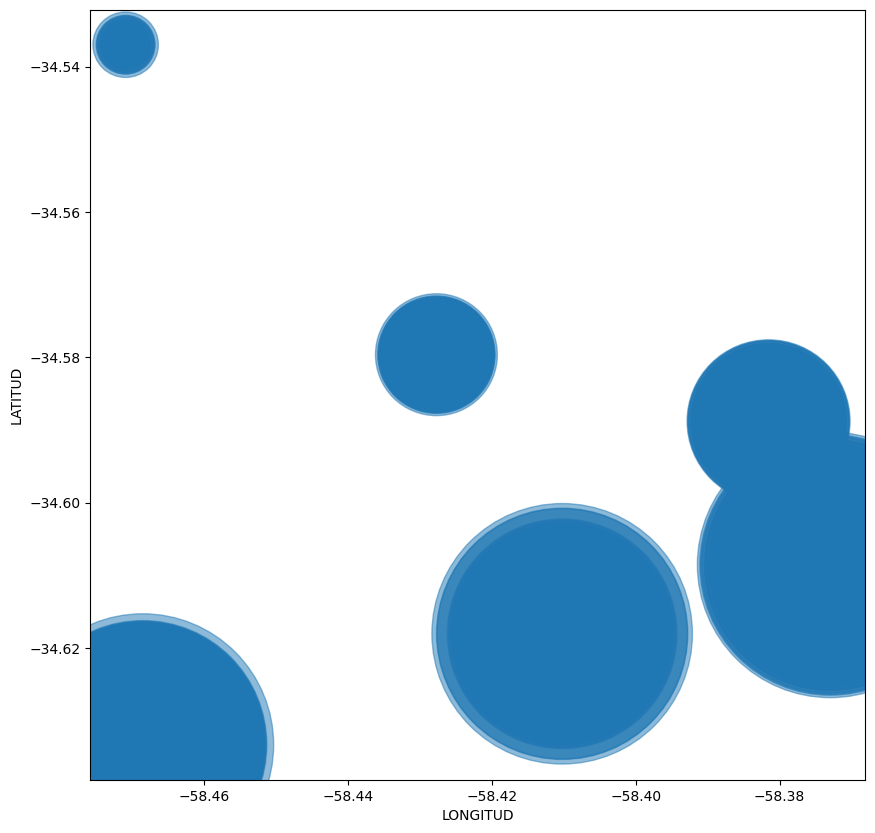

In [51]:
# plot new["CANTIDAD"] vs lat and long

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(new["LONGITUD"][:1000], new["LATITUD"][:1000], s=new["CANTIDAD"][:1000]*10, alpha=0.5)

ax.set_xlabel("LONGITUD")
ax.set_ylabel("LATITUD")

plt.show()

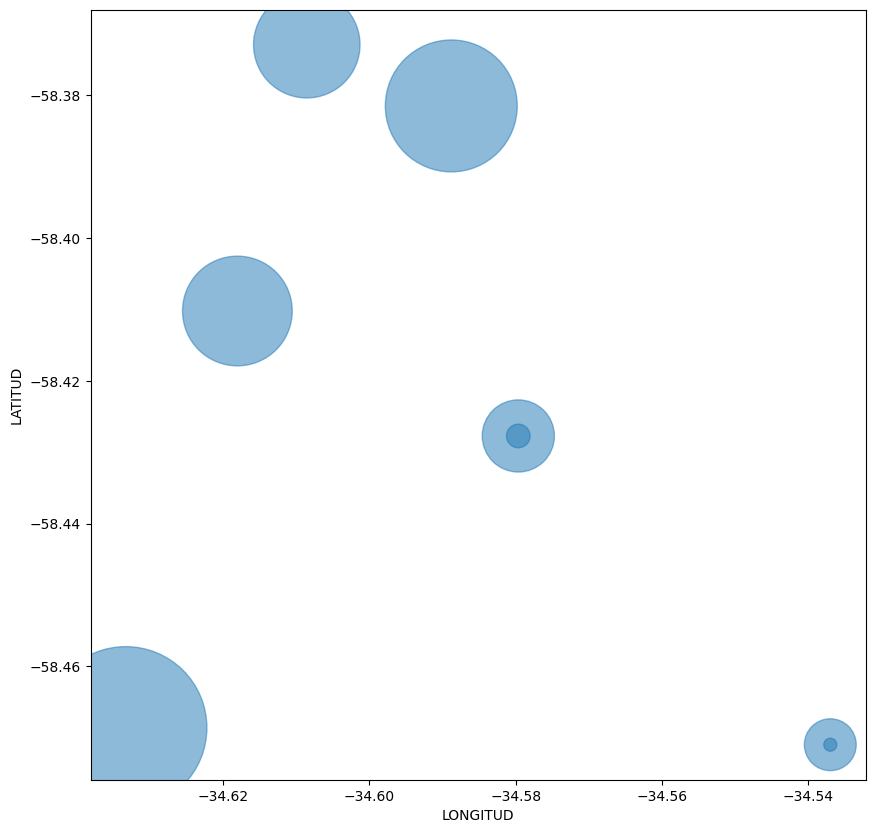

In [58]:
# plot new["CANTIDAD"] vs lat and long

fig, ax = plt.subplots(figsize=(10,10))

dfg = new.groupby(["LATITUD", "LONGITUD"]).sum().reset_index()

x = dfg["LATITUD"][0:1000]
y = dfg["LONGITUD"][0:1000]
z = dfg["CANTIDAD"][0:1000]

ax.scatter(x, y, s=z*0.0001, alpha=0.5)

ax.set_xlabel("LONGITUD")
ax.set_ylabel("LATITUD")

plt.show()

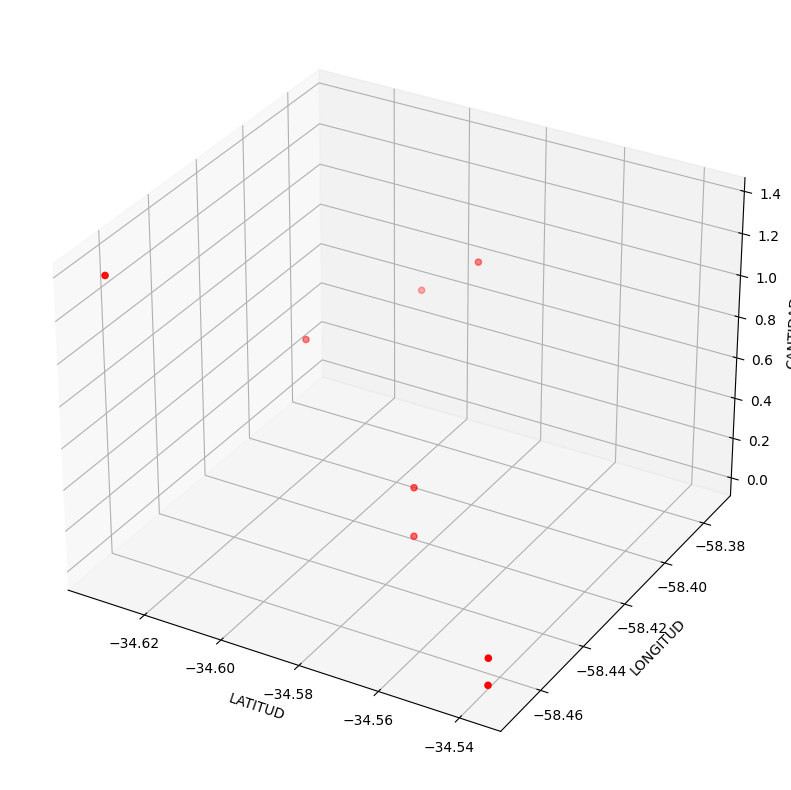

In [62]:
# 3d plot new["CANTIDAD"] vs lat and long

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x = dfg["LATITUD"][0:1000]
y = dfg["LONGITUD"][0:1000]
z = dfg["CANTIDAD"][0:1000]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('LATITUD')
ax.set_ylabel('LONGITUD')
ax.set_zlabel('CANTIDAD')

plt.show()

In [63]:
new

,CANTIDAD,SENTIDO,LATITUD,LONGITUD,anio,mes,dia,hr
0,729,Interna,-34.588796,-58.381520,2020,3,31,15
1,447,Egreso,-34.588796,-58.381520,2020,3,31,15
2,175,Interna,-34.633299,-58.468594,2020,3,31,15
3,1186,Egreso,-34.633299,-58.468594,2020,3,31,15
4,35,Egreso,-34.579632,-58.427733,2020,3,31,15
...,...,...,...,...,...,...,...,...
189809,6542,Ingreso,-34.633299,-58.468594,2022,1,26,15
189810,1168,Interna,-34.633299,-58.468594,2022,1,26,15
189811,7870,Egreso,-34.633299,-58.468594,2022,1,26,16
189812,5991,Ingreso,-34.633299,-58.468594,2022,1,26,16


In [65]:
# new["greater_mean"] is true if new["CANTIDAD"] is greater than the mean of the column for a given "LATITUD" and "LONGITUD"

# this is too slow
# new["greater_mean"] = new.apply(lambda x: x["CANTIDAD"] > new[new["LATITUD"] == x["LATITUD"]][new["LONGITUD"] == x["LONGITUD"]]["CANTIDAD"].mean(), axis=1)

# this is faster
new["greater_mean"] = new["CANTIDAD"] > new.groupby(["LATITUD", "LONGITUD"])["CANTIDAD"].transform("mean")

# this is even faster
#new["greater_mean"] = new["CANTIDAD"] > new.groupby(["LATITUD", "LONGITUD"])["CANTIDAD"].mean().reset_index()["CANTIDAD"]

In [69]:
new[new["greater_mean"]]

,CANTIDAD,SENTIDO,LATITUD,LONGITUD,anio,mes,dia,hr,greater_mean
5,523,Interna,-34.579632,-58.427733,2020,3,31,15,True
13,600,Interna,-34.579632,-58.427733,2020,3,31,14,True
24,597,Interna,-34.579632,-58.427733,2020,3,31,13,True
35,572,Interna,-34.579632,-58.427733,2020,3,31,12,True
212,523,Interna,-34.579632,-58.427733,2020,3,30,20,True
...,...,...,...,...,...,...,...,...,...
189806,6730,Ingreso,-34.633299,-58.468594,2022,1,26,14,True
189808,7618,Egreso,-34.633299,-58.468594,2022,1,26,15,True
189809,6542,Ingreso,-34.633299,-58.468594,2022,1,26,15,True
189811,7870,Egreso,-34.633299,-58.468594,2022,1,26,16,True


In [73]:
new.drop('CANTIDAD', axis=1).sample(10000).to_csv('data/flujo_vehicular.csv', index=False)

/Users/nacho/opt/anaconda3/envs/coding/lib/python3.8/site-packages/pandas/core/internals/blocks.py:2183: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
